# Feature Scaling (Data Normalization)

Feature scaling is a method used to bring the numerical independent variables or features of data into a range so that features with very high values do not bias the model and avoid features that are significant but have lower values compared to other features to not loose its importance. It is generally performed during the data preprocessing stage.

Feature Scaling is performed only on the numerical features.

To skip to [Feature Scaling](#encode).

Data Set - https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
    - 3.3 - **[Feature Scaling](#encode)**
        - 3.3.1 - **[Standardization](#dum)**
        - 3.3.2 - **[Min Max Normalization](#one)**

    
    

<a id="lib"></a>
## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


<a id="about"></a>
## 2. About the Dataset

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [3]:
df=pd.read_csv('bigmartsales-cleaned.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


<a id="miss"></a>
## 3.2 Analysing Missing Values

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

<a id="encode"></a>
## 3.3 Feature Scaling

In [6]:
# Spliting numerical and categorical data because feature scaling is performed only on numerical data
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(np.number)

<a id="dum"></a>
### 3.3.1 Standardization

Standardization is performed when the data is normal.

Converts data such that mean is 0 and standard deviation is 1.

In [5]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()
dfs=pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)
dfs.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,-0.411451,-0.970732,1.747685,0.139541,0.910601,-1.125033
1,-0.996583,-0.908111,-1.489032,1.334103,-1.018440,0.520342
2,1.008098,-0.956917,0.009657,0.139541,-0.049238,0.637869
3,1.302395,-1.281758,0.660212,0.020085,-0.849103,0.108998
4,-0.475504,-1.281758,-1.399078,-1.293934,-0.695373,0.402815


<AxesSubplot:ylabel='Density'>

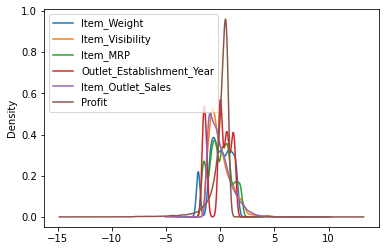

In [17]:
dfs.plot(kind='kde')

<a id="one"></a>
### 3.3.2 Min Max Normalization

Min max normalization is performed when the data is not normal.

Min max normaliztion preserves the linear relationship of the data, hence correlation between the data remains the same. It fits the data between 0 and 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mm = MinMaxScaler()
dfm=pd.DataFrame(mm.fit_transform(df_num),columns=df_num.columns)
dfm.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
0,0.435597,0.048866,0.927419,0.583333,0.283587,0.476987
1,0.277283,0.058705,0.072156,1.000000,0.031419,0.594142
2,0.819672,0.051037,0.468166,0.583333,0.158115,0.602510
3,0.899297,0.000000,0.640068,0.541667,0.053555,0.564854
4,0.418267,0.000000,0.095925,0.083333,0.073651,0.585774


<AxesSubplot:ylabel='Density'>

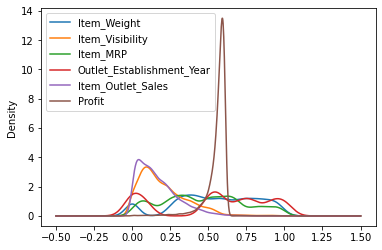

In [19]:
dfm.plot(kind='kde')

In [22]:
dfm.max()

Item_Weight                  1.0
Item_Visibility              1.0
Item_MRP                     1.0
Outlet_Establishment_Year    1.0
Item_Outlet_Sales            1.0
Profit                       1.0
dtype: float64

In [23]:
dfm.min()

Item_Weight                  0.0
Item_Visibility              0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Item_Outlet_Sales            0.0
Profit                       0.0
dtype: float64